#  Customer Churn Analysis 

## By Prathish Murugan 

### The IBM Dataset and Info can be found is available on [ IBM Business Analytics Community](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)  [.](https://www.kaggle.com/blastchar/telco-customer-churn)
<br>

## Introduction and Background


### What is Customer Churn ?

 Customer churn is defined as the number of customers who have stopped doing business with a company during a given time period. Churn poses a problem for a business as it lowers revenues and profits. Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers, attracting a new customer costs five times as much as keeping an existing one. So To reduce customer churn, Companies need to predict which customers are at high risk of churn.


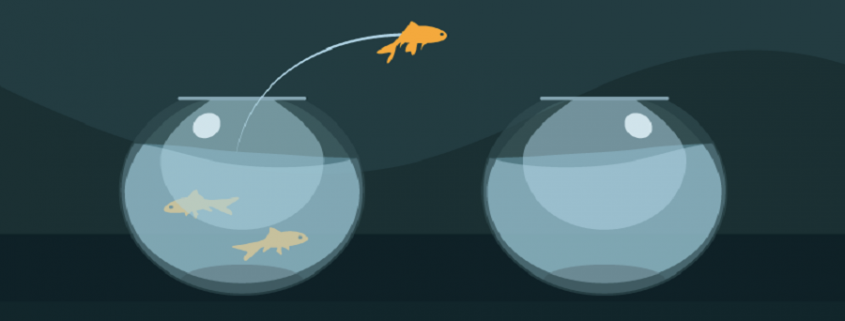

<br>
<br>

### Data 

The Telco customer churn data contains information about a telecom company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index. _The original module contains five data tables, but only three will be considered for analysis: Demographics, Services, and Status_.  
<br>

- Each row represents a customer.
- Each column contains customer’s attributes.

#### The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents
<br>

#### For details about each attribute, click [here](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113).
<br>
<br>

In [1]:
#import the required libraries

import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline


#### Reading the data

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Churn\Customer-Churn.csv')

#### Basic Details about the Dataset

In [3]:
#Print the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
print('The dataset has', df.shape[0], 'lines (customers) and', df.shape[1], 'variables (attributes)')

The dataset has 7043 lines (customers) and 21 variables (attributes)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
df.duplicated().sum()  # Check for duplicated data

0

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<br>

Notice how the **TotalCharges** feature has a datatype of **object**. So we need to change it into **float64**
<br>
<br>

In [9]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<br>

### Data Sensemaking

In the end, we want to predict whether the subscribers become churn or not. Let's quickly look at the distribution of the target variable.


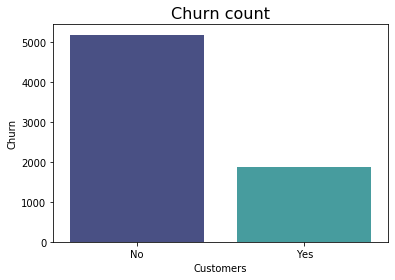

In [10]:
sns.countplot(data=df, x="Churn", palette="mako")
plt.title('Churn count', fontsize=16)
plt.xlabel('Customers')
plt.ylabel('Churn')
plt.show()

There is an unequal distribution between Churn Label = Yes and Churn Label = No. A majority of the churn data are labeled No while this case places more importance on predicting the Yes.

In [11]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [12]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

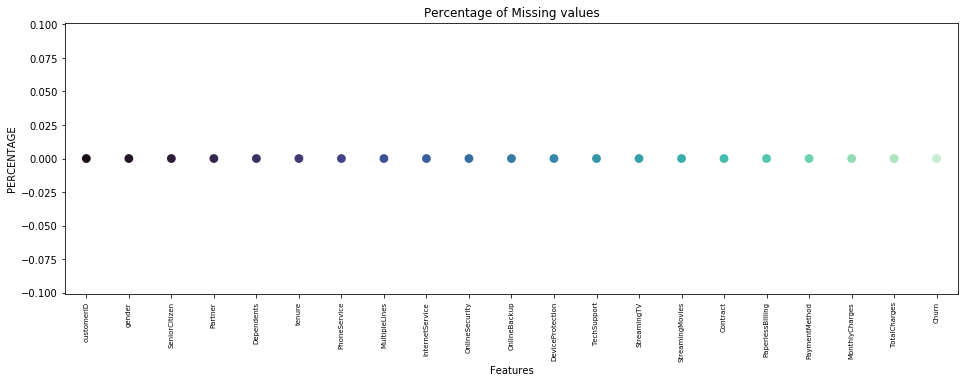

In [13]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing, palette="mako")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.xlabel("Features")
plt.ylabel("PERCENTAGE")
plt.show()

## Data Cleaning

- Create a copy of base data for manupulation & processing

In [14]:
df_churn = df.copy()

- Total Charges should be numeric amount. Let's convert it to numerical data type

In [15]:
df_churn.TotalCharges = pd.to_numeric(df_churn.TotalCharges, errors='coerce')
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<br>
 As we can see there are 11 missing values in TotalCharges column. Let's check these records

<br>

In [16]:
df_churn.loc[df_churn['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<br>
- Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

<br>

In [17]:
#Removing missing values 
df_churn.dropna(how = 'any', inplace = True)
#  * 'any' : If any NA values are present, drop that row or column.

In [18]:
df_churn.loc[df_churn ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


-  Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [19]:
# Get the max tenure
print(df_churn['tenure'].max())

72


In [20]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_churn['tenure_group'] = pd.cut(df_churn.tenure, range(1, 80, 12), right=False, labels=labels)

In [21]:
df_churn['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

<br>

- Now let us drop the coulumns which are not required for processing

<br>

In [22]:
# drop column customerID and tenure
# We drop tenure as we have already grouped them into buckets
df_churn.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


<br>

## Data Exploration and Data Visualisation
<br>


- Plot distibution of individual predictors by churn

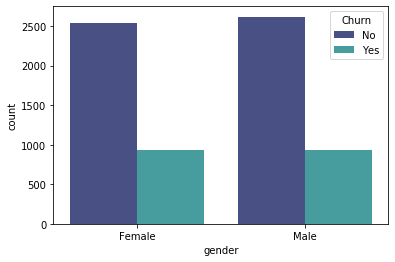

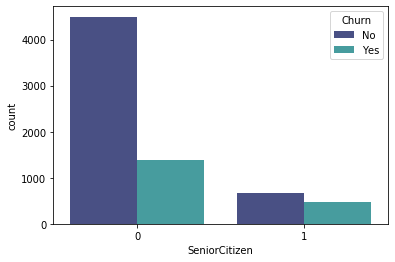

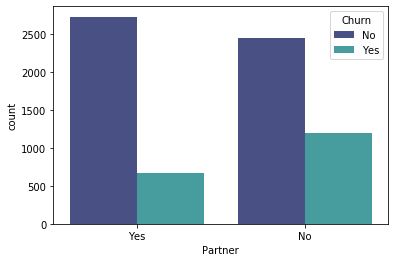

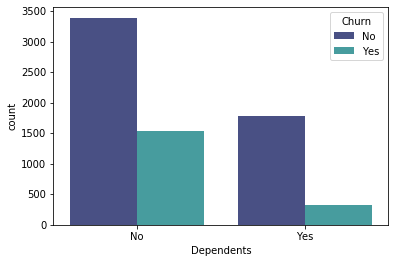

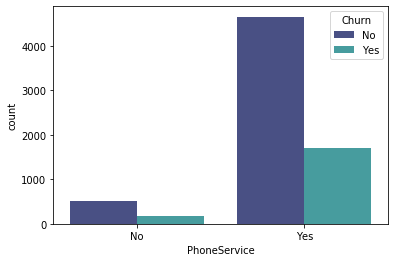

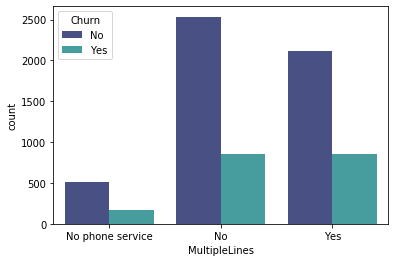

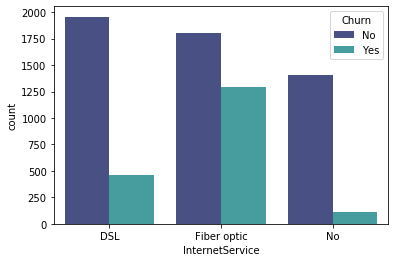

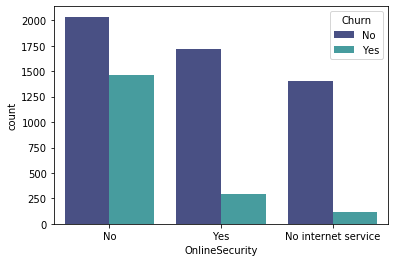

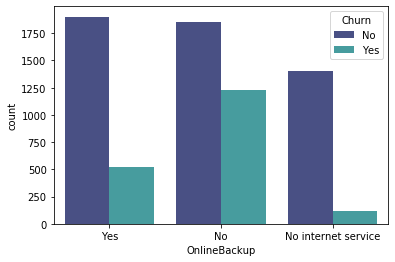

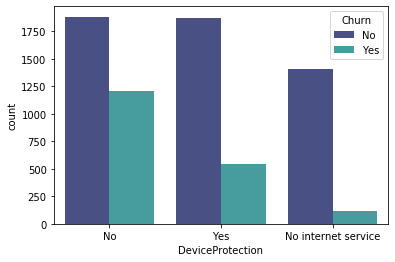

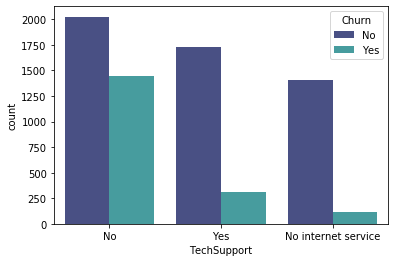

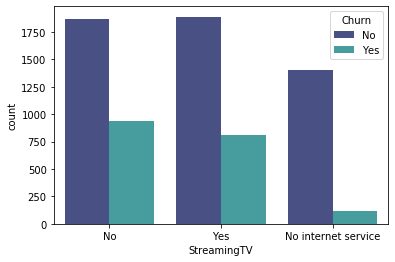

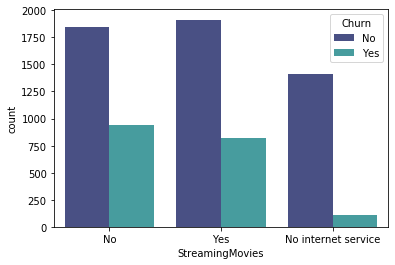

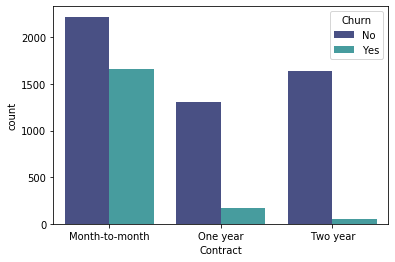

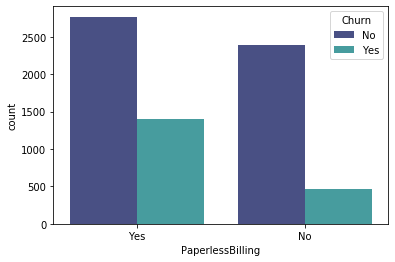

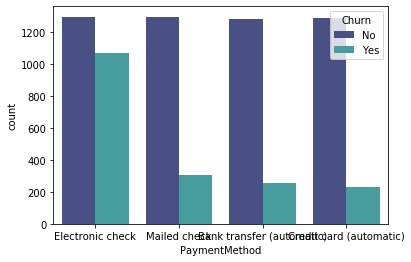

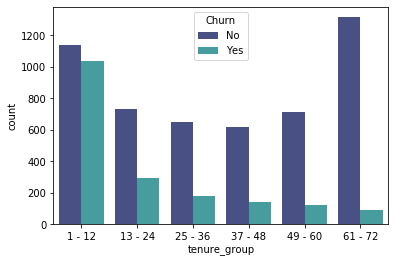

In [23]:
for i, predictor in enumerate(df_churn.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df_churn, x=predictor, hue='Churn', palette="mako")

In [24]:
# Warning:- Dont run this cell more than once or else the Churn values will be made into '0'

#Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0
df_churn['Churn'] = np.where(df_churn.Churn == 'Yes',1,0)
 

In [25]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


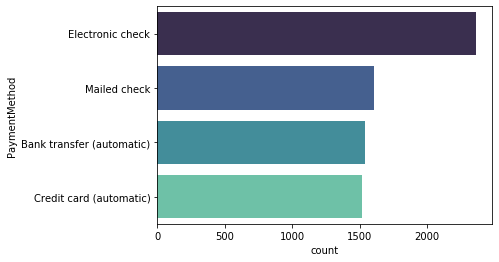

In [26]:
sns.countplot(data=df_churn, y="PaymentMethod", palette="mako")

- Most of the costumers uses an eletronic check payment method, followed by mailed check, bank transfer, and credit card. These last two are automatic payment methods.
- Most of the costumers has paperless billing.
- Most of the costumers had a month-to-month contract, followed by two year contract, and one year contract

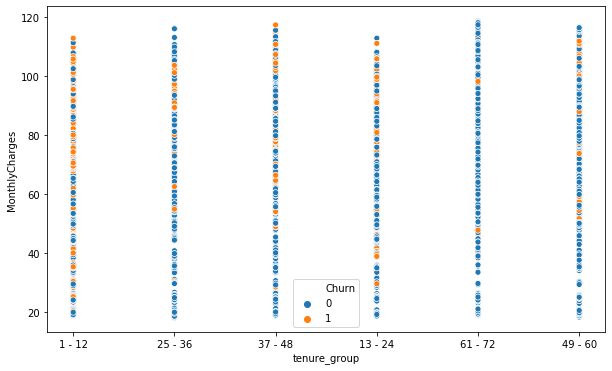

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure_group', y='MonthlyCharges', data= df_churn, hue='Churn')

- Lot of orange dots can be seen in the **1 - 12** bucket indicating higher churners 

#### Convert all the categorical variables into dummy variables

In [28]:
df_dummies = pd.get_dummies(df_churn)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


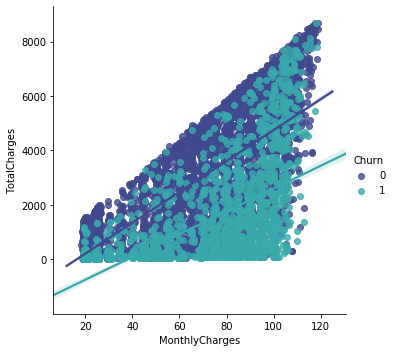

In [29]:
# Relationship between Monthly Charges and Total Charges
sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges', hue="Churn", palette="mako")

Total Charges increase as Monthly Charges increase

Text(0.5, 1.0, 'Monthly charges by churn')

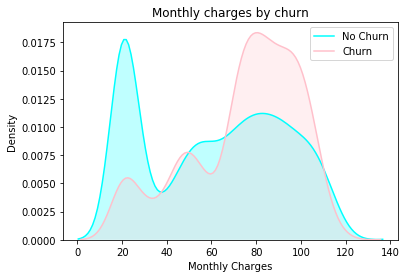

In [30]:
# Churn by Monthly Charges and Total Charges


kde = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
                color="cyan", shade = True)
kde = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],
                ax =kde, color="pink", shade= True)
kde.legend(["No Churn","Churn"],loc='upper right')
kde.set_ylabel('Density')
kde.set_xlabel('Monthly Charges')
kde.set_title('Monthly charges by churn')

General Trend is that when **Monthly Charges** increases, the churn increases

Text(0.5, 1.0, 'Total charges by churn')

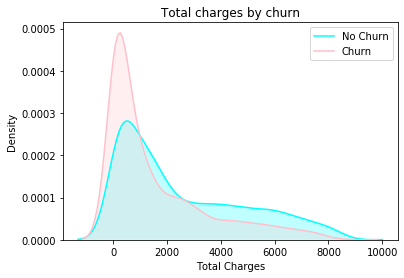

In [31]:
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
                color="cyan", shade = True)
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],
                ax =Tot, color="pink", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

But here unlike **Monthly charges**, there is higher Churn at lower **Total Charges**

The insights we gathered are that Higher **Monthly Charge** at lower **Tenure** results into lower **Total Charge**. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.

#### Finding the correlation between features and Churn

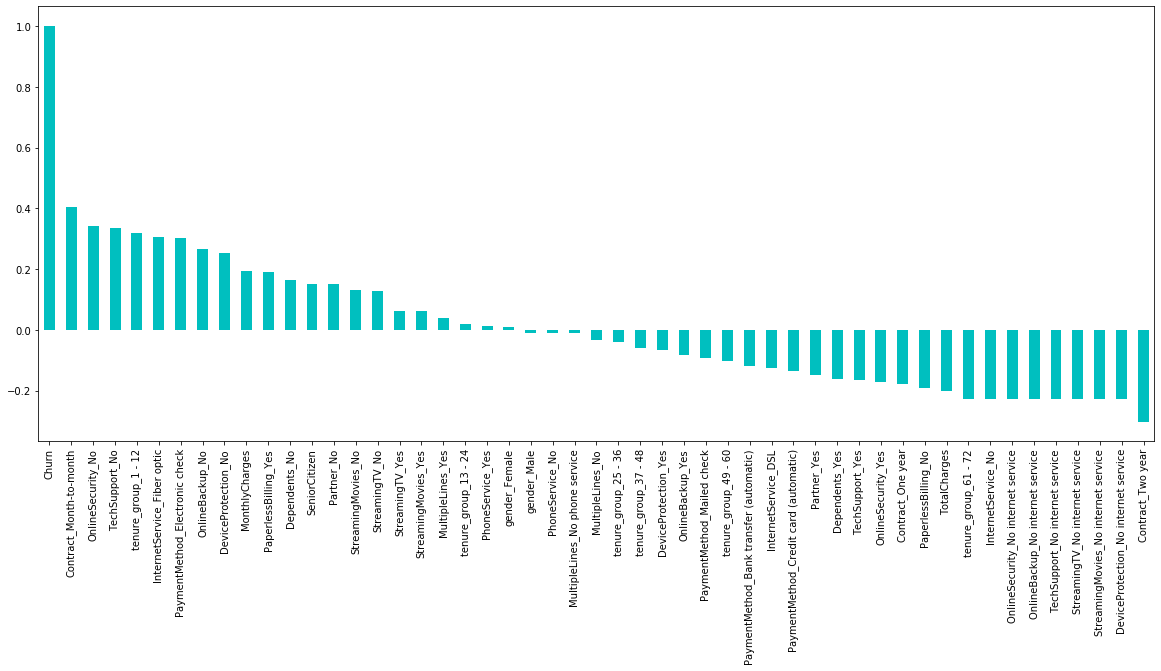

In [32]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color='c')

#### Factors Causing of High Churn
- Month to Month Contracts
- No online security 
- No Tech support 
- First year of subscription 
- Fibre Optics Internet

#### Factors Against High Churn
- Long term contracts 
- Subscriptions without internet service  
- The customers engaged for 5+ years


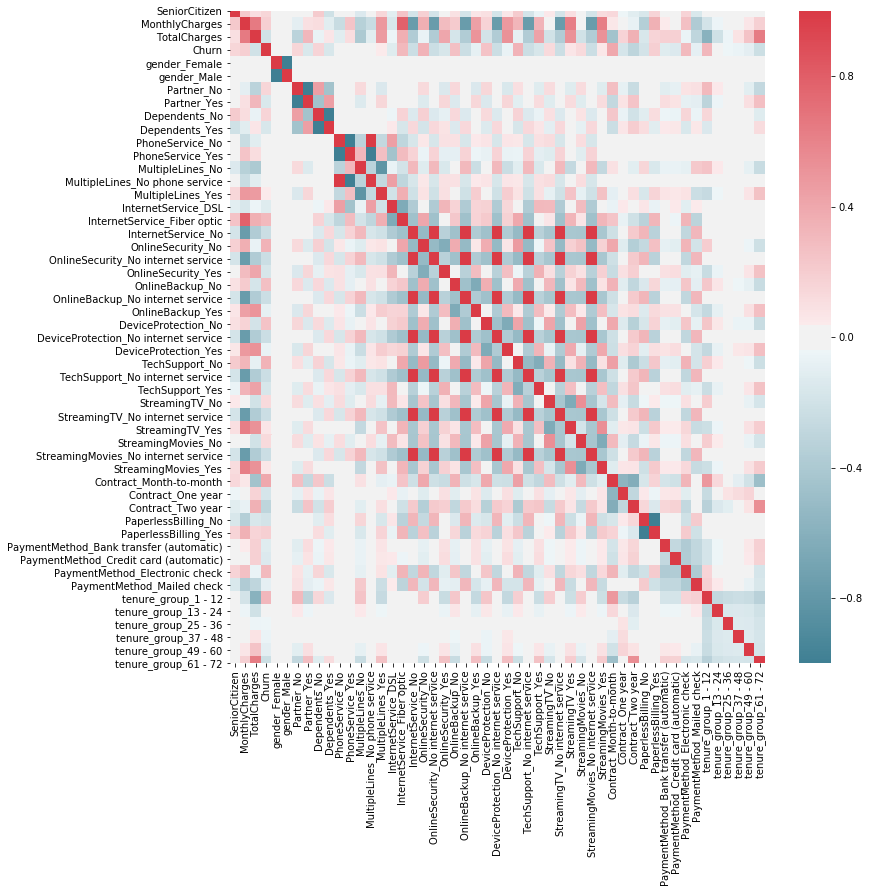

In [38]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap=cmap)

## Final Insights 


- Customers with phone services are less likely to churn
- Customers with internet services are more likely to churn
- Customers with a longer relationship with the company are less likely to churn
- Customers monthly contract are more likely to churn
- Customers with paperless billing are more likely to churn
- Customers with automatic payment methods are less likely to churn


In [39]:
# We will export the results as a csv file 

df_dummies.to_csv('tel_churn.csv')